In [22]:
!pip install -q lalsuite
! pip install -q 'gwpy==3.0.8'
!pip install -q pycbc
!pip install --upgrade pip
#--for pycbc

In [23]:
from pycbc import frame
pycbc_strain = frame.read_frame('challenge1.gwf', 'H1:CHALLENGE1')

In [24]:
#--for gwpy
from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge1.gwf', channel = 'H1:CHALLENGE1')

In [12]:
print (gwpy_strain)

TimeSeries([ 1.09389188e-21,  1.21228706e-22,  1.64565889e-24,
            ..., -4.43135131e-23, -2.34576855e-22,
             4.51019899e-22]
           unit: ct,
           t0: -64.0 s,
           dt: 0.000244140625 s,
           name: H1:CHALLENGE1,
           channel: None)


In [4]:
!pip install -q lalsuite
!pip install -q gwpy
!pip install -q pycbc
#--for pycbc
from pycbc import frame
pycbc_strain = frame.read_frame('challenge1.gwf', 'H1:CHALLENGE1')


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [12]:
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt

strain=TimeSeries.read('challenge1.gwf', channel = 'H1:CHALLENGE1')
#useful for spectogram
delta_t = strain.dt

sampling_rate= strain.sample_rate.value
duration = strain.duration.value

print("Sampling Rate", sampling_rate, "Hz")
print("Duration", duration, "seconds")

Sampling Rate 4096.0 Hz
Duration 128.0 seconds


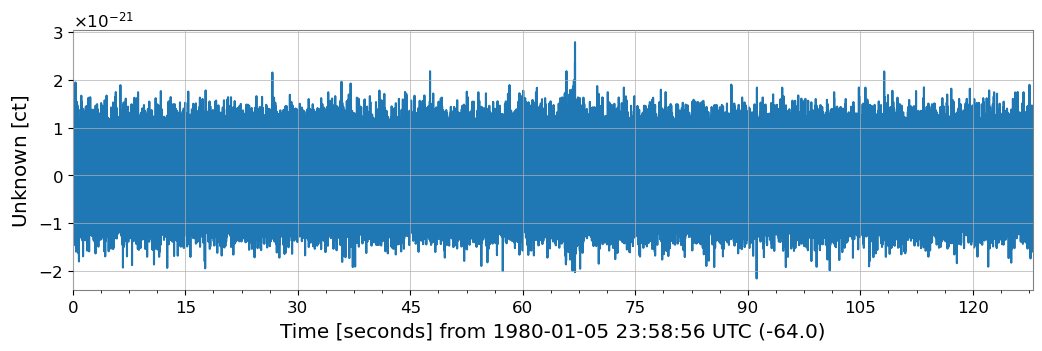

In [6]:
%matplotlib inline
plot = strain.plot()

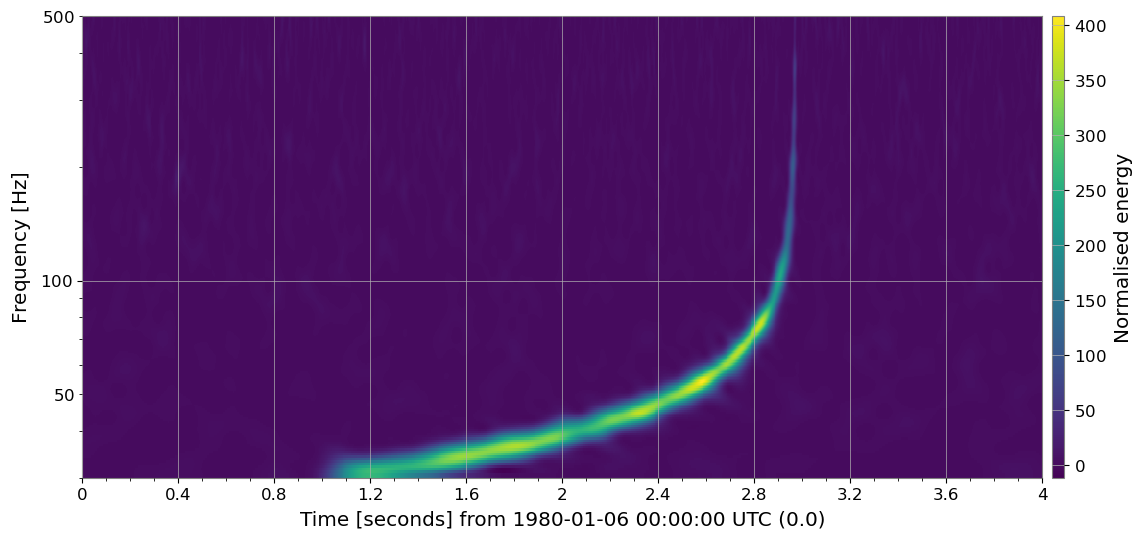

In [7]:
hq = strain.q_transform(frange=(30, 500), qrange=(10, 25),outseg=(0,4))
plot = hq.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

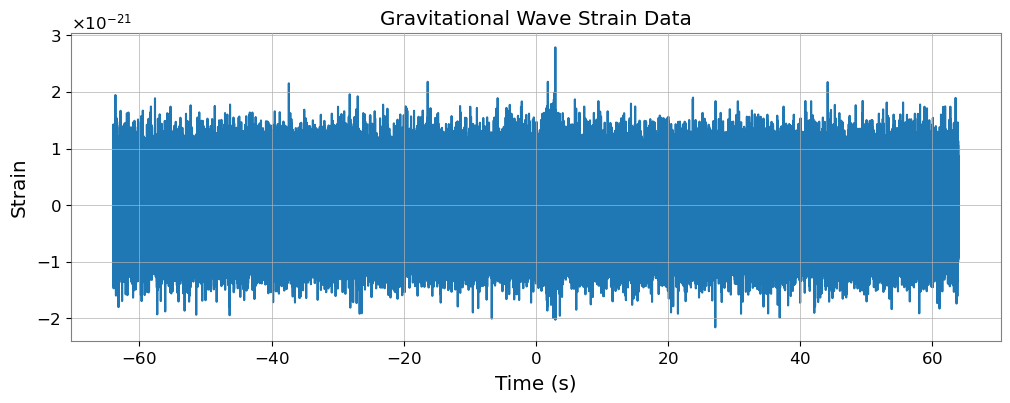

In [8]:

# Plot strain data
plt.figure(figsize=(12, 4))
plt.plot(strain.times, strain)
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title('Gravitational Wave Strain Data')
plt.show()


In [13]:
time_series = TimeSeries(strain, delta_t=1.0/duration)

# Plot spectrogram
spectrogram = time_series.spectrogram(fftlength=4)

# Plot
plt.figure(figsize=(12, 4))
plt.imshow(spectrogram, aspect='auto', origin='lower', extent=strain.times.value[[0, -1, 0, 2000]])
plt.colorbar(label='Amplitude')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of Gravitational Wave Strain Data')
plt.show()

TypeError: __new__() got an unexpected keyword argument 'delta_t'

In [14]:
from gwpy.signal import filter

# Filter the data to enhance the signal
filtered_strain = strain.bandpass(20, 300)

# Find the peak time
peak_time = filtered_strain.argmax()

print(f"Time of the merger: {peak_time}")


ImportError: cannot import name 'filter' from 'gwpy.signal' (/opt/conda/lib/python3.8/site-packages/gwpy/signal/__init__.py)